In [2]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [4]:
english_df = pd.read_csv("/home/nadiera/Desktop/Translation/TranslationData_OPUS/af-en_large/wikimedia.af-en.en", "ut-8", header=None, names=["English"])

/home/nadiera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
english_df.head()

English
0  The Eugène Marais Prize is a South African lit...
1  In 1971 it was renamed after the Afrikaans poe...
2  The prize has no genre limitation, but only wo...
3    Further, an author can only win the award once.
4  The prize money (as of 2009) was R22 000 and w...

In [59]:
nchct_en_df = pd.read_csv("/home/nadiera/Desktop/Translation/Translation Data_SADILAR/corpora.nchlt.en/en/1.Corpus/CORP.NCHLT.eng.CLEAN.1.0.0.txt", "ut-8", header=None, names=["English"])

/home/nadiera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [60]:
nchct_en_df.head()

English
0  ______________________________________________...
1  License: Creative Commons Attribution 2.5 Sout...
2  URL: http://creativecommons.org/licenses/by/2....
3   Name and version: NCHLT English Text Corpus v1.0
4  Attribute work to: Centre for Text Technology ...

In [6]:
afrikaans_df = pd.read_csv("/home/nadiera/Desktop/Translation/TranslationData_OPUS/af-en_large/wikimedia.af-en.af", "utf-8", header=None, names=["Afrikaans"])
afrikaans_df.head()

/home/nadiera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Afrikaans
0  Die Eugène Maraisprys, vantevore bekend as die...
1  Dit is in 1971 hernoem na die Afrikaanse digte...
2  Die prys het geen genre-indeling nie, maar sle...
3    Voorts kan 'n skrywer dit net een keer verower.
4  Die prysgeld bedra tans (2009) R22,000 en word...

In [57]:
nchct_af_df = pd.read_csv("/home/nadiera/Desktop/Translation/Translation Data_SADILAR/corpora.nchlt.af/af/2.Corpora/CORP.NCHLT.af.CLEAN.2.0.txt", "utf-8", header=None, names=["Afrikaans"])
nchct_af_df.head()

/home/nadiera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Afrikaans
0  ______________________________________________...
1  License: Creative Commons Attribution 2.5 Sout...
2  URL: http://creativecommons.org/licenses/by/2....
3  Name and version: NCHLT Clean Afrikaans Text C...
4  Attribute work to: South African Department of...

### Data Preprocessing

In [7]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [16]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")



In [61]:
# Cleaning the nchtl data for english dataset

data_nchlt_en = []
lang_nchlt_en = []

for i, line in nchct_en_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_nchlt_en.append(line)
        lang_nchlt_en.append("English")


In [62]:
# Cleaning the data for afrikaans dataset

data_nchlt_af = []
lang_nchlt_af = []

for i, line in nchct_af_df.iterrows():
    line = line['Afrikaans']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_nchlt_af.append(line)
        lang_nchlt_af.append("Afrikaans")

 ### Transforming the data into a single dataset

In [63]:
df = pd.DataFrame({
    "Text" : data_eng+data_afr+data_nchlt_en+data_nchlt_af,
    "Language" : lang_eng+lang_afr+lang_nchlt_en+lang_nchlt_af
})

print(df.shape)

(357830, 2)


In [64]:
df.head()

Text Language
0  the eugène marais prize is a south african lit...  English
1  in  it was renamed after the afrikaans poet an...  English
2  the prize has no genre limitation but only wor...  English
3      further an author can only win the award once  English
4  the prize money as of  was r  and was sponsore...  English

In [66]:
df['Language'].value_counts()

English      209957
Afrikaans    147873
Name: Language, dtype: int64

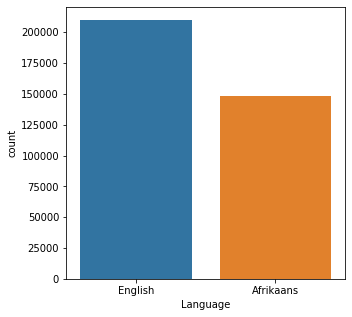

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['Language'], data=df)


In [68]:
df

Text   Language
0       the eugène marais prize is a south african lit...    English
1       in  it was renamed after the afrikaans poet an...    English
2       the prize has no genre limitation but only wor...    English
3           further an author can only win the award once    English
4       the prize money as of  was r  and was sponsore...    English
...                                                   ...        ...
357825  lw hierdie versameling boeke word as museummat...  Afrikaans
357826  die manuskripversameling sluit verskeie tipes ...  Afrikaans
357827  naln besit volledige versamelings van prakties...  Afrikaans
357828  elke berig of artikel rakende die afrikaanse l...  Afrikaans
357829  alle kategorieë van oudiovisuele materiaal rak...  Afrikaans

[357830 rows x 2 columns]

In [120]:
df.drop([143400 , 224728,6, 348, 968, 1005, 3193, 3823, 5638, 10128, 10913, 11849, 12410, 13720, 14887, 16232, 17726, 17727, 18135, 18152, 18165, 18441, 18970, 22628, 29023, 29289, 29290, 32230, 32349, 32355, 32428, 32853, 34762, 34770, 36033, 36034, 36035, 36036, 36038, 36377, 38013, 41924, 42343, 42640, 44846, 44858, 44859, 44862, 44868, 44922, 46766, 48626, 48909, 49092, 51640, 54164, 54411, 54630, 54721, 54748, 55045, 57103, 57554, 58229, 62966, 63325, 63326, 64464, 65062, 66541, 66555, 66897, 67517, 67554, 77462, 77488, 78398, 78959, 80269, 81436, 82781, 84275, 84276, 85365, 85519, 89177, 95572, 95839, 96767, 98904, 98977, 99402, 100854, 100927, 101293, 101311, 101319, 102582, 102583, 102584, 102585, 102587, 102926, 106613, 108473, 108892, 109189, 109676, 110627, 115641, 118189, 119479, 121270, 121297, 121594, 123652, 124103, 124778, 131013, 133090, 133256, 133257, 133259, 133269, 133270, 133271, 133272, 133273, 133274, 133277, 133279, 133280, 133281, 134230, 134239, 134253, 134254, 134280, 134283, 134295, 134306, 134325, 134332, 134336, 134345, 134377, 134381, 134383, 134384, 134391, 134402, 134403, 134407, 134408, 134410, 134414, 134423, 134440, 134450, 134461, 134484, 134509, 134512, 134519, 134526, 134527, 134903, 134906, 134907, 134908, 134911, 134950, 135027, 138932, 139922, 140571, 140612, 140677, 140949, 141320, 141359, 141684, 141800, 141927, 142414, 142870, 142898, 143035, 143484, 143494, 144774, 144831, 146215, 147089, 147359, 147360, 147362, 147364, 147365, 147379, 147380, 147397, 147411, 147442, 147562, 147613, 148828, 148829, 148832, 148834, 148853, 149092, 149095, 149387, 149578, 149721, 150425, 151038, 151096, 151160, 151171, 151221, 151260, 151343, 151380, 151399, 151511, 151546, 151745, 151874, 152149, 152586, 152626, 154362, 155425, 155697, 156178, 156484, 157027, 157427, 158131, 158170, 158211, 158215, 158216, 160549, 160552, 160555, 161094, 161099, 161121, 161159, 161163, 162182, 163509, 163534, 163564, 163612, 163623, 163668, 163743, 163745, 163803, 163813, 163896, 163963, 164031, 164108, 164149, 164732, 164801, 164981, 165230, 165236, 165239, 165243, 165253, 165777, 166085, 166090, 167687, 167812, 167910, 168442, 168741, 168852, 169618, 171951, 172617, 172646, 173834, 174273, 174275, 174636, 174646, 175399, 176242, 176294, 176376, 176698, 178928, 179094, 179217, 179270, 179985, 180083, 180090, 180095, 180126, 180127, 180151, 180159, 180464, 180486, 180487, 180884, 180996, 180999, 181076, 181150, 181700, 181708, 181717, 181727, 182608, 182659, 183040, 183044, 183465, 183466, 183467, 183594, 183666, 184116, 184152, 184437, 184468, 184471, 184566, 185675, 186178, 186256, 186376, 189812, 189818, 190074, 190080, 190332, 190536, 191059, 191062, 191063, 191065, 191069, 191767, 191768, 191769, 191771, 191774, 191776, 191781, 191784, 191787, 191789, 193178, 195297, 195332, 195433, 195988, 197251, 197255, 197258, 198191, 198294, 198309, 198314, 198321, 198323, 198326, 198327, 198328, 198333, 198343, 198345, 198349, 198371, 198373, 198380, 198382, 198387, 198394, 198426, 198434, 198438, 198470, 198484, 198551, 198559, 198564, 198573, 198574, 198581, 198586, 198598, 198617, 198630, 198756, 198757, 198777, 198779, 198786, 198840, 198842, 198847, 200613, 201863, 201957, 202695, 202696, 203617, 203765, 203767, 203805, 203808, 204938, 204940, 204946, 206048, 206050, 206102, 206108, 206680, 206696, 206703, 206704, 206745, 206927, 206929, 206934, 206935, 206941, 206944, 207026, 207215, 207277, 207282, 207284, 207286, 207875, 208060, 208063, 208096, 208104, 208110, 208169, 208179, 208181, 208195, 208234, 208299, 208317, 208343, 209919, 209922, 209927, 211827, 214670, 214985, 215110, 215419, 218603, 219383, 219561, 219569, 220021, 220927, 221812, 222311, 223958, 223968, 224079, 224689, 224861, 224862, 225172, 225173, 225179, 225705, 225715, 226085, 226091, 226110, 226398, 226687, 227126, 227127, 227128, 227136, 227675, 228013, 228164, 228928, 229850, 230971, 230972, 231056, 231359, 231459, 231461, 231478, 231507, 231544, 233100, 233516, 234036, 234712, 235453, 236253, 236456, 236520, 236792, 236852, 236957, 237543, 237556, 237874, 237875, 239635, 239641, 239662, 239667, 239846, 239848, 241471, 241763, 242276, 242282, 242285, 242303, 242315, 242317, 243770, 243773, 243778, 243779, 243781, 244320, 244349, 244394, 244421, 244472, 244498, 244510, 246022, 246059, 246168, 246184, 246233, 246780, 246979, 247644, 247880, 248587, 250343, 250905, 250922, 250968, 251737, 251876, 251877, 251881, 251882, 251887, 251914, 252844, 252941, 253357, 253358, 254114, 254806, 254809, 254890, 254932, 255250, 256068, 256071, 256403, 256405, 256406, 256407, 256413, 256857, 256883, 257018, 257385, 257424, 257438, 257453, 257473, 257881, 258435, 259291, 259292, 259303, 259305, 259307, 259312, 259321, 259611, 260612, 260758, 260759, 260818, 261124, 261158, 262277, 262433, 262911, 262912, 262928, 263217, 263218, 263455, 263468, 263488, 263519, 264521, 264540, 264565, 264566, 264644, 264650, 264667, 264673, 265062, 265611, 265707, 269436, 272969, 273046, 274669, 275583, 275585, 276098, 276135, 276191, 276215, 276249, 276251, 276279, 276324, 277789, 278369, 278522, 280612, 280613, 280614, 280615, 280620, 280630, 280631, 280632, 280635, 281871, 283145, 288131, 290075, 290551, 290989, 294399, 294446, 295519, 295562, 295748, 295818, 296383, 296469, 296561, 296566, 296568, 296569, 296570, 296571, 296572, 296573, 296574, 296576, 296577, 296578, 296580, 296581, 296582, 296583, 296584, 296585, 296592, 296593, 296595, 296596, 296598, 296599, 296601, 296745, 301825, 304270, 304500, 304844, 307461, 308732, 310260, 310907, 311233, 311478, 319399, 319864, 320529, 320540, 320542, 321496, 321545, 322030, 322126, 322821, 326517, 326526, 331453, 333924, 333938, 334030, 334393, 334440, 336871, 336996, 338169, 338185, 338186, 338192, 338193, 339045, 343592, 343698, 343858, 344600, 345261, 354496, 356594, 357010, 357013, 357160, 357172, 357193, 357230, 357237, 357593, 357714], inplace = True)


In [121]:
# converting type of columns to 'category'
df['Language'] = df['Language'].astype('category')# Assigning numerical values and storing in same column
#df['class_label'] = df['Language'].cat.codes/# Assigning numerical values and storing in same column
df['Label'] = df['Language'].cat.codes 
df

Text   Language  Label  \
0       the eugène marais prize is a south african lit...    English      1   
1       in  it was renamed after the afrikaans poet an...    English      1   
2       the prize has no genre limitation but only wor...    English      1   
3           further an author can only win the award once    English      1   
4       the prize money as of  was r  and was sponsore...    English      1   
...                                                   ...        ...    ...   
357825  lw hierdie versameling boeke word as museummat...  Afrikaans      0   
357826  die manuskripversameling sluit verskeie tipes ...  Afrikaans      0   
357827  naln besit volledige versamelings van prakties...  Afrikaans      0   
357828  elke berig of artikel rakende die afrikaanse l...  Afrikaans      0   
357829  alle kategorieë van oudiovisuele materiaal rak...  Afrikaans      0   

                                                   tokens  
0       [the, eugène, marais, prize, is, a, south, afr...  
1       [in, it, was, renamed, after, the, afrikaans, ...  
2       [the, prize, has, no, genre, limitation, but, ...  
3       [further, an, author, can, only, win, the, awa...  
4       [the, prize, money, as, of, was, r, and, was, ...  
...                                                   ...  
357825  [lw, hierdie, versameling, boeke, word, as, mu...  
357826  [die, manuskripversameling, sluit, verskeie, t...  
357827  [naln, besit, volledige, versamelings, van, pr...  
357828  [elke, berig, of, artikel, rakende, die, afrik...  
357829  [alle, kategorieë, van, oudiovisuele, materiaa...  

[357075 rows x 4 columns]

In [123]:
#df['Text'][6]

In [124]:
df.isnull().sum()

Text        0
Language    0
Label       0
tokens      0
dtype: int64

In [125]:
df["Text"] = df["Text"].fillna('').apply(str)

In [126]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["Text"].apply(tokenizer.tokenize)
df.head()

Text Language  Label  \
0  the eugène marais prize is a south african lit...  English      1   
1  in  it was renamed after the afrikaans poet an...  English      1   
2  the prize has no genre limitation but only wor...  English      1   
3      further an author can only win the award once  English      1   
4  the prize money as of  was r  and was sponsore...  English      1   

                                              tokens  
0  [the, eugène, marais, prize, is, a, south, afr...  
1  [in, it, was, renamed, after, the, afrikaans, ...  
2  [the, prize, has, no, genre, limitation, but, ...  
3  [further, an, author, can, only, win, the, awa...  
4  [the, prize, money, as, of, was, r, and, was, ...

In [127]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))



10254986 words total, with a vocabulary size of 236339
Max sentence length is 200


In [128]:
#larger_elements = [element for element in sentence_lengths if element > 200]

In [129]:
#len(larger_elements)

In [131]:
#sentence_lengths.index(160)

In [132]:
#indices = []

#for i in range(len(sentence_lengths)):


   #if sentence_lengths[i]>200 :

      #indices.append(i)


#print(indices)

In [133]:
#len(indices)

In [134]:
 
#type(sentence_lengths)

In [74]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/home/nadiera/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

In [135]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 100
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df["Text"].tolist())
sequences = tokenizer.texts_to_sequences(df["Text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(df["Label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 240139 unique tokens.
(240140, 300)


In [136]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [137]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(df["Label"].unique())), False)


In [138]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 300)     72042000    ['input_2[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 98, 128)      115328      ['embedding_1[0][0]']            
                                                                                                  
 conv1d_5 (Conv1D)              (None, 97, 128)      153728      ['embedding_1[0][0]']            
                                                                                            

In [139]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
2232/2232 [==============================] - 92s 41ms/step - loss: 0.0933 - acc: 0.9665 - val_loss: 0.0750 - val_acc: 0.9716
Epoch 2/5
2232/2232 [==============================] - 91s 41ms/step - loss: 0.0717 - acc: 0.9727 - val_loss: 0.0671 - val_acc: 0.9741
Epoch 3/5
2232/2232 [==============================] - 90s 40ms/step - loss: 0.0641 - acc: 0.9746 - val_loss: 0.0663 - val_acc: 0.9742
Epoch 4/5
2232/2232 [==============================] - 90s 41ms/step - loss: 0.0579 - acc: 0.9762 - val_loss: 0.0685 - val_acc: 0.9747
Epoch 5/5
2232/2232 [==============================] - 90s 40ms/step - loss: 0.0527 - acc: 0.9781 - val_loss: 0.0723 - val_acc: 0.9741


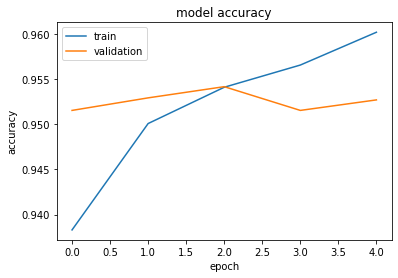

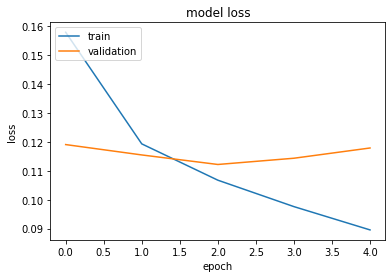

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
y_hat = model.predict(x_val)
y_hat

array([[2.9909319e-01, 7.0090681e-01],
       [9.9999988e-01, 1.5508422e-07],
       [3.9581850e-05, 9.9996042e-01],
       ...,
       [9.6429994e-06, 9.9999034e-01],
       [2.9188552e-01, 7.0811445e-01],
       [1.0000000e+00, 2.9282762e-10]], dtype=float32)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(list(map(lambda x: np.argmax(x), y_val)), list(map(lambda x: np.argmax(x), y_hat)))

0.952702956534806